### Binary Search Tree

A binary search tree relies on the property that keys that are less than the parent are found in the left subtree, and keys that are greater than the parent are found in the right subtree.

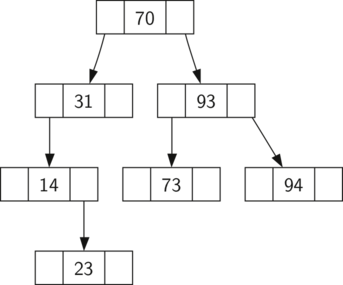

In [1]:
from IPython.display import Image
Image(filename='simpleBST.png', width=300) 

In [2]:
# https://www.laurentluce.com/posts/binary-search-tree-library-in-python/
# The codes bleow are from the above git and web page.

In [3]:
class Node(object):
    """Tree node: left and right child + data which can be any object

    """
    def __init__(self, data):
        """Node constructor
        
        @param data node data object
        """
        self.left = None
        self.right = None
        self.data = data

    def insert(self, data):
        """Insert new node with data

        @param data node data object to insert
        """
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.insert(data) # recursive call
            elif data > self.data:
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.insert(data) # recursive call
        else:
            self.data = data

    def lookup(self, data, parent = None):
        """Lookup node containing data

        @param data node data object to look up
        @param parent node's parent
        @returns node and node's parent if found or None, None
        """
        if data < self.data:
            if self.left is None:
                return None, None
            return self.left.lookup(data, self)
        elif data > self.data:
            if self.right is None:
                return None, None
            return self.right.lookup(data, self)
        else: # ==
            return self, parent

    def delete(self, data):
        """Delete node containing data

        @param data node's content to delete
        """
        # get node containing data
        node, parent = self.lookup(data)
        if node is not None:
            children_count = node.children_count()
            if children_count == 0:
                # if node has no children, just remove it
                if parent:
                    if parent.left is node:
                        parent.left = None
                    else:
                        parent.right = None
                else: # why?
                    self.data = None
            elif children_count == 1:
                # if node has 1 child
                # replace node by its child
                if node.left:
                    n = node.left
                else:
                    n = node.right
                if parent:
                    if parent.left is node:
                        parent.left = n
                    else:
                        parent.right = n
                else:
                    self.left = n.left
                    self.right = n.right
                    self.data = n.data
            else:
                # if node has 2 children
                # find its successor
                parent = node
                successor = node.right
                while successor.left:
                    parent = successor
                    successor = successor.left
                # replace node data by its successor data
                node.data = successor.data
                # fix successor's parent node child
                if parent.left == successor:
                    parent.left = successor.right
                else:
                    parent.right = successor.right

    def compare_trees(self, node):
        """Compare 2 trees

        @param node tree to compare
        @returns True if the tree passed is identical to this tree
        """
        if node is None:
            return False
        if self.data != node.data:
            return False
        res = True
        if self.left is None:
            if node.left:
                return False
        else:
            res = self.left.compare_trees(node.left)
        if res is False:
            return False
        if self.right is None:
            if node.right:
                return False
        else:
            res = self.right.compare_trees(node.right)
        return res

    def print_tree(self):
        """Print tree content inorder

        """
        if self.left:
            self.left.print_tree()
        print(self.data, end=" ")
        if self.right:
            self.right.print_tree()

    def children_count(self):
        """Return the number of children

        @returns number of children: 0, 1, 2
        """
        cnt = 0
        if self.left:
            cnt += 1
        if self.right:
            cnt += 1
        return cnt

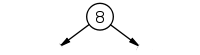

In [4]:
# __init__

root = Node(8)
Image(filename='bst1.png', width=200) 

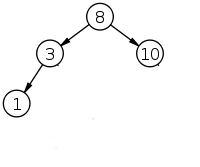

In [5]:
# insert()

root.insert(3)
root.insert(10)
root.insert(1)
Image(filename='bst2.png', width=200) 

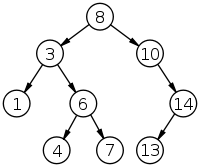

In [6]:
# insert()

root.insert(6)
root.insert(4)
root.insert(7)
root.insert(14)
root.insert(13)
Image(filename='bst3.png', width=300) 

In [7]:
# lookup()

node, parent = root.lookup(6)

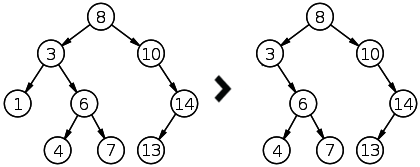

In [8]:
# delete()

root.delete(1)
Image(filename='bst4.png', width=400) 

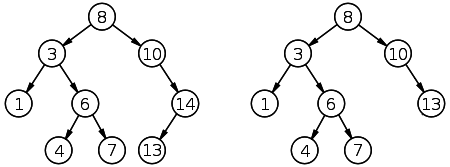

In [9]:
# delete()

root.delete(14)
Image(filename='bst5.png', width=400) 

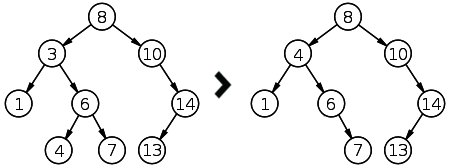

In [10]:
# delete()

root.delete(3)
Image(filename='bst6.png', width=400) 

In [11]:
# print_tree()

root.print_tree()

4 6 7 8 10 13 

In [12]:
# compare_trees()

root.compare_trees(root.left)

False

### Binary Search Tree Analysis

What is the **height** of a binary tree likely to be?

The answer to this question depends on how the keys are added to the tree. If the keys are added in a random order, the height of the tree is going to be around $log_2 n$ where $n$ is the number of nodes in the tree.

The number of nodes at any particular level is $2d$ where $d$ is the depth of the level. The total number of nodes in a perfectly **balanced binary tree** is $2^{h+1}−1$, where $h$ represents the height of the tree.

In a balanced binary tree, the worst-case performance of *insert()* is $O(log_2 n)$, where $n$ is the number of nodes in the tree. 

Unfortunately it is possible to construct a search tree that has height $n$ simply by inserting the keys in sorted order! An example of such a tree is shown below. In this case the performance of the put method is $O(n)$.

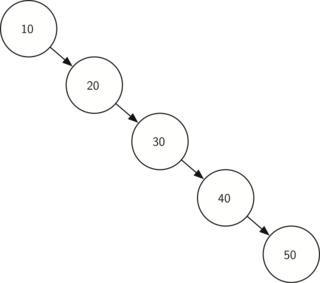

In [13]:
Image(filename='skewedTree.png', width=300) 

In [14]:
# Q: how about delete() and 

### Balanced Tree

As we learned, the performance of the binary search tree can degrade to $O(n)$ for operations like *insert()* when the tree becomes unbalanced. Now we look at a special kind of binary search tree that automatically makes sure that the tree remains balanced at all times. This tree is called an **AVL** tree and is named for its inventors: G.M. Adelson-Velskii and E.M. Landis.

To implement our AVL tree we need to keep track of a **balance factor** for each node in the tree. 

$balanceFactor = height(leftSubTree) − height(rightSubTree)$

We define a tree to be in balance if the balance factor is -1, 0, or 1. 

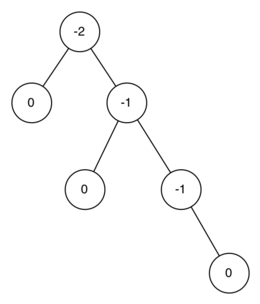

In [15]:
Image(filename='unbalanced.png', width=300)

In [16]:
# Again! Computing balance factor in a binary tree can be a 'divide-and-conquer' algorithm.

### The worst case of AVL tree

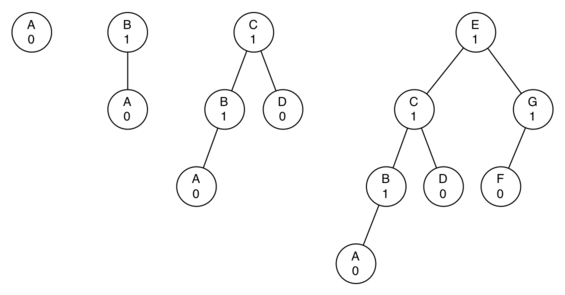

In [17]:
Image(filename='worstAVL.png', width=600)

# The following trees are still AVL tree, but they are the example of the worst cases of heights 0, 1, 2, and 3.

Looking at the total number of nodes in the above trees.

Height 0: total number of the nodes is 1.

Height 1: total number of the nodes is 1+1 = 2.

Height 2: total number of the nodes is 1+1+2 = 4.

Height 3: total number of the nodes is 1+4+2 = 7.

Height 4: total number of the nodes is 1+7+4 = 12.

The number of nodes in a tree of height $h$ ($N_h$) is:

$ N_h = 1 + N_{h−1} + N_{h−2}$

For your reference (i.e., you don't have to remember this):

The height of an AVL tree with $N_h$ nodes satisfies

$h < 1.4404 log_2 (N_h+2) - 0.328$

or simply

$ h < 2 log N_h$

### Rebalance
Please take a look at the AVL_rotation.pdf.

An important property of AVL trees is that one rotation (single or double) is always sufficient after an insertion.

However, deletion are more complicated. It is no longer true that the tree can be rebalanced with only one rotation after a deletion. There are cases where $O(log n)$ rotations are required, where $n$ is the number of nodes in the tree.

Fortunately, each rotation requires only constant number of steps; thus, the worst-case running time of a deletion is still $O(log n)$.